## Ejercicio 6 Monte Carlo

Usando la generacion de puntos sobre una esfera estime los momentos de inercia de la
esfera respecto a los ejes de rotacion Ixx, Iyy, Izz.
Compare con el resultado exacto Iij = 2/5 para i = x, y, z con i = j. Adicionalmente,
estime el producto de inercia Ixy:


<IPython.core.display.Javascript object>


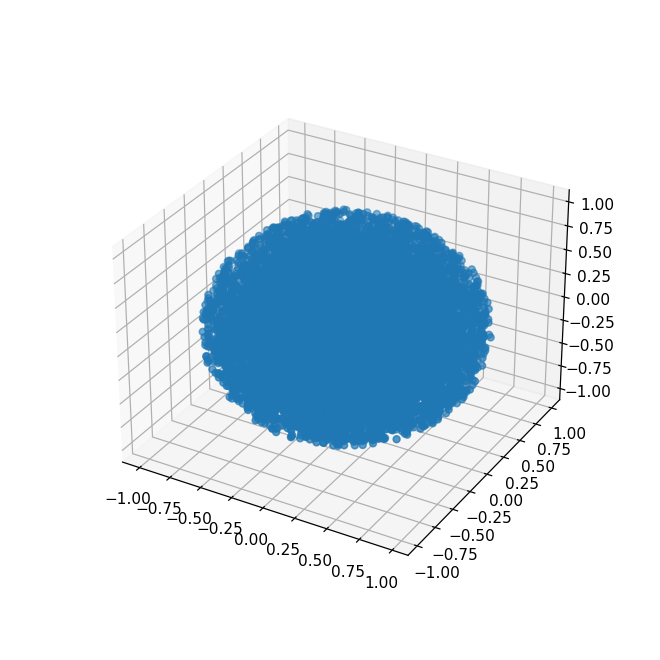

El Momento de inercia Ixx: 0.39947716084294443
Su error relativo es: 0.0013070978926389698
El Momento de inercia Iyy: 0.3996753451191255
Su error relativo es: 0.0008116372021862994
El Momento de inercia Izz: 0.39862479227244957
Su error relativo es: 0.0034380193188761343
El Momento de inercia Ixy: -0.0005607088933546103
Su error relativo es: 0.0014017722333865255


In [38]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

def CreateSphere(N,R=1):
    
    Points = np.zeros((N,3))
        
    for i in range(N):
        
        phi = np.random.uniform(0,2*np.pi)  
        u = np.random.rand() 
        r = R*u**(1/3)
        costheta = np.random.uniform(-1,1) 
        theta = np.arccos(costheta)
        
        Points[i] = [r*np.cos(phi)*np.sin(theta),r*np.sin(phi)*np.sin(theta),r*np.cos(theta)] 
        
    return Points 

def MonteCarloSphere(N):
    
    Sphere = CreateSphere(N) 
    V = 4/3*np.pi 
    
    Ixx = np.sum(Sphere[:,1]**2 + Sphere[:,2]**2) / N  
    Iyy = np.sum(Sphere[:,0]**2 + Sphere[:,2]**2) / N 
    Izz = np.sum(Sphere[:,0]**2 + Sphere[:,1]**2) / N 
    
    Ixy = np.sum(Sphere[:,0]*Sphere[:,1]) / N  
    
    return (Ixx, Iyy, Izz, Ixy)

Ixx, Iyy, Izz, Ixy = MonteCarloSphere(50000)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(Sphere[:,0],Sphere[:,1],Sphere[:,2])
I_exacto = 0.4
error_Ixx = abs(Ixx - I_exacto) / I_exacto
error_Iyy = abs(Iyy - I_exacto) / I_exacto
error_Izz = abs(Izz - I_exacto) / I_exacto
error_Ixy = abs(Ixy) / I_exacto 
print(f"El Momento de inercia Ixx: {Ixx}\nSu error relativo es: {error_Ixx}")
print(f"El Momento de inercia Iyy: {Iyy}\nSu error relativo es: {error_Iyy}")
print(f"El Momento de inercia Izz: {Izz}\nSu error relativo es: {error_Izz}")
print(f"El Momento de inercia Ixy: {Ixy}\nSu error relativo es: {error_Ixy}")


Observamos que el momento de inercia de Ixx, Iyy y Izz, tienen el mismo valor por lo que es simetrica en cuanto a rotaciones
alrededor de los ejes principales x,y,z. por lo tanto al recorrer la espefera en cualquier dirección que se observe desde (0,0,0)
su centro, su forma y distancia hacia el borde exterior no cambia, manteniendo asi los momentos de inceria iguales.